# Gemini for multi-modal prompting


## Learning Objectives


1. Learn how to generate text from text prompts using the Gemini
2. Learn how to explore various features and configuration options 
3. Learn how to generate text from image(s) and text prompts with Gemini
4. Learn how to generate text from video and text prompts with Gemini
5. Learn how to use all modalities at once using Gemini



## Overview

### Gemini
In this notebook, you will learn how to use the Google Gen AI SDK for Python to interact with the Gemini.
Gemini is a family (e.g., Gemini Pro, Gemini Flash, Gemini Flash-Lite) of generative AI models developed by Google DeepMind that is designed for multimodal use cases.  

You can interact with Gemini in many ways, including:
- The [Vertex AI Studio](https://cloud.google.com/generative-ai-studio) for quick testing and command generation
- cURL commands
- The Google Gen AI SDK.

### Google Gen AI SDK
[Google Gen AI Python SDK](https://github.com/googleapis/python-genai) provides an interface for developers to integrate Google's generative models including Gemini into their Python applications. It supports the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and [Vertex AI APIs](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/overview).


This notebook focuses on using the **Gen AI SDK** to call the Vertex AI Gemini APIs.

For more information, see the [Generative AI on Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/overview) documentation.


## Import libraries

In [1]:
import http.client
import io
import typing
import urllib.request

import IPython.display
from google import genai
from google.genai.types import GenerateContentConfig, Part
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps
from pydantic import BaseModel

## Setup
### Specify Gemini version

The Gemini model is designed to handle natural language tasks, multiturn text and code chat, and code generation. Here we use `gemini-2.0-flash-001` version.

In [2]:
MODEL = "gemini-2.0-flash-001"

### Set up Gen AI SDK client
Let's instantiate the Gen AI SDK client. You can call Gemini via either Vertex AI and Gemini Developer API.

Here we use Vertex AI by spefifying `vertexai=True`.

In [3]:
client = genai.Client(vertexai=True, location="us-central1")

## Generate text from text prompts

Send a text prompt to the model. The Gemini model provides a streaming response mechanism. With this approach, you don't need to wait for the complete response; you can start processing fragments as soon as they're accessible.


In [13]:
responses = client.models.generate_content(
    model=MODEL, contents="Why is the sky blue?"
)
responses.text
# for response in responses:
#     print(response.text, end="")

"The sky is blue due to a phenomenon called **Rayleigh scattering**. Here's a breakdown:\n\n*   **Sunlight and its Colors:** Sunlight appears white, but it's actually made up of all the colors of the rainbow.\n\n*   **Entering the Atmosphere:** When sunlight enters the Earth's atmosphere, it collides with tiny air molecules (mostly nitrogen and oxygen).\n\n*   **Scattering of Light:** This collision causes the sunlight to scatter in different directions.\n\n*   **Rayleigh Scattering and Wavelength:**  Rayleigh scattering is more effective at scattering light with shorter wavelengths. Blue and violet light have shorter wavelengths than other colors like red, orange, and yellow.\n\n*   **Why Blue Dominates:** Blue light is scattered about 10 times more effectively than red light. So, when sunlight enters the atmosphere, blue light is scattered much more widely than other colors.\n\n*   **Why Not Violet?** Violet light has the shortest wavelength and is scattered even more than blue. Howe

### Try your own prompts

- What are the biggest challenges facing the healthcare industry?
- What are the latest developments in the automotive industry?
- What are the biggest opportunities in retail industry?
- (Try your own prompts!)


In [5]:
prompt = """Create a numbered list of 10 items. Each item in the list should be a trend in the tech industry.

Each trend should be less than 5 words."""  # try your own prompt

responses = client.models.generate_content_stream(model=MODEL, contents=prompt)

for response in responses:
    print(response.text, end="")

Okay, here's a list of 10 tech industry trends, each described in under 5 words:

1.  AI-powered everything.
2.  Cloud-native applications.
3.  Remote work enablement.
4.  Cybersecurity mesh architecture.
5.  Sustainable tech practices.
6.  Metaverse experiences emerging.
7.  Low-code/No-code platforms.
8.  Edge computing expanding.
9.  Quantum computing progress.
10. Personalized digital health.


### Model parameters

Every prompt you send to the model includes parameter values that control how the model generates a response. The model can generate different results for different parameter values. The `temperature` parameter controls the amount of consistency in the response. With a temperature of 0 you'll consistently get the exact same answer to the same prompt, and as you increase the temperature you'll get more "creative" albeit less consistent answers. The `top_p` and `top_k` control the tokens that are considered by the LLM to generate the answer. If you set `top_p` to 0.2 for instance, the model will only consider the most probable token for an answer whose probability sums up to 0.2, while if you set `top_k` to 100, the model will only consider the top 100 most probable tokens.  `candidate_counts` determines the number of candidate answers you want to be generated, while `max_output_tokens` specifies the maximum number of tokens allowed per candidate answer. 


You can experiment with different model parameters to see how the results change.


In [6]:
generation_config = GenerateContentConfig(
    temperature=0.9,
    top_p=1.0,
    top_k=32,
    candidate_count=1,
    max_output_tokens=8192,
)

responses = client.models.generate_content_stream(
    model=MODEL, config=generation_config, contents="Why is the sky blue?"
)

for response in responses:
    print(response.text, end="")

The sky is blue because of a phenomenon called **Rayleigh scattering**. Here's a breakdown:

*   **Sunlight Composition:** Sunlight is made up of all the colors of the rainbow.

*   **Atmosphere Interaction:** When sunlight enters the Earth's atmosphere, it collides with tiny air molecules (mostly nitrogen and oxygen).

*   **Scattering:** This collision causes the sunlight to scatter in different directions.

*   **Rayleigh Scattering Preference:** Rayleigh scattering is more effective at scattering shorter wavelengths of light. Blue and violet light have shorter wavelengths than other colors like red and orange.

*   **Why Blue, Not Violet?** While violet is scattered even more than blue, there's less violet light in sunlight to begin with. Our eyes are also less sensitive to violet light compared to blue. And some of the violet light gets absorbed by the upper atmosphere.

*   **The Result:** Because blue light is scattered more effectively, it's scattered all over the sky. This is 

### Test chat prompts

The Gemini model supports natural multi-turn conversations and is ideal for text tasks that require back-and-forth interactions. The following examples show how the model responds during a multi-turn conversation.


In [ ]:
chat = client.chats.create(model=MODEL)
prompt = """My name is Ned. You are my personal assistant. My favorite movies are Lord of the Rings and Hobbit.

Suggest another movie I might like.
"""

responses = chat.send_message_stream(prompt)

for response in responses:
    print(response.text, end="")

This follow-up prompt shows how the model responds based on the previous prompt:


In [ ]:
prompt = "Are my favorite movies based on a book series?"

responses = chat.send_message_stream(prompt)

for response in responses:
    print(response.text, end="")

You can also view the chat history:


In [ ]:
print(chat.get_history())

## Use Gemini for Multimodal data

Gemini is a multimodal model that supports multimodal prompts. You can include text, image(s), and video in your prompt requests and get text or code responses.


### Define helper functions

Define helper functions to load and display images.


In [7]:
def display_byte_image(image_bytes: bytes) -> None:
    image = PIL_Image.open(io.BytesIO(image_bytes))
    IPython.display.display(image)


def get_image_bytes_from_url(image_url: str) -> bytes:
    if image_url.startswith("gs://"):
        image_url = get_url_from_gcs(image_url)
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
    return image_bytes


def get_url_from_gcs(gcs_uri: str) -> str:
    # converts gcs uri to url for image display.
    url = "https://storage.googleapis.com/" + gcs_uri.replace(
        "gs://", ""
    ).replace(" ", "%20")
    return url


def print_multimodal_prompt(contents: list):
    """
    Given contents that would be sent to Gemini,
    output the full multimodal prompt for ease of readability.
    """
    for content in contents:
        if isinstance(content, Part):
            if content.inline_data:
                mime_type = content.inline_data.mime_type
                if mime_type.startswith("image"):
                    display_byte_image(content.inline_data.data)
            elif content.file_data:
                mime_type = content.file_data.mime_type
                if mime_type.startswith("image"):
                    image_bytes = get_image_bytes_from_url(
                        content.file_data.file_uri
                    )
                    display_byte_image(image_bytes)
            elif content.text:
                print(content.text)
        if isinstance(content, str):
            print(content)

### Generate text from text & image(s)
#### Generate text from local image and text

Use the `Part.from_bytes` method to load a local file as the image to generate text for.


Copying gs://cloud-samples-data/generative-ai/image/320px-Felis_catus-cat_on_snow.jpg...
/ [1 files][ 17.4 KiB/ 17.4 KiB]                                                
Operation completed over 1 objects/17.4 KiB.                                     
-------Prompt--------


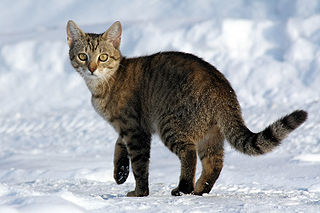

Describe this image?

-------Response--------
Here's a description of the image:

**Overall Impression:**

The image shows a tabby cat standing in the snow. The cat is looking directly at the viewer, appearing alert and slightly curious.

**Cat Details:**

*   **Coat:** It's a tabby cat, which means it has a distinctive striped or mottled pattern on its fur. The colors appear to be predominantly brown and black.
*   **Eyes:** The cat has yellow or golden eyes.
*   **Pose:** The cat is standing with one paw slightly raised as if it's in the middle of taking a step. Its tail is curled.

**Background:**

*   The background is covered in snow. There are some tire tracks visible in the snow, suggesting a road or path.

**Overall Tone:**

The image has a natural and slightly candid feel, capturing a moment in the cat's life. The presence of snow gives it a wintery atmosphere.

In [8]:
# Download an image from Google Cloud Storage
local_path = "image.jpg"
! gsutil cp "gs://cloud-samples-data/generative-ai/image/320px-Felis_catus-cat_on_snow.jpg" {local_path}

with open(local_path, "rb") as f:
    image_bytes = f.read()

# Load from local file
image = Part.from_bytes(data=image_bytes, mime_type="image/jpeg")

# Prepare contents
prompt = (
    "Describe this image?"  # or Part.from_text(text="Describe this image?")
)

contents = [image, prompt]

responses = client.models.generate_content_stream(
    model=MODEL, contents=contents
)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

#### Images with URL

If your images are stored in [Cloud Storage](https://cloud.google.com/storage/docs) or have direct links, you can specify the URI of the image to include in the prompt. You must also specify the `mime_type` field. The supported MIME types for images include `image/png` and `image/jpeg`.

Note that the URI (not to be confused with URL) for a Cloud Storage object should always start with `gs://`.

-------Prompt--------


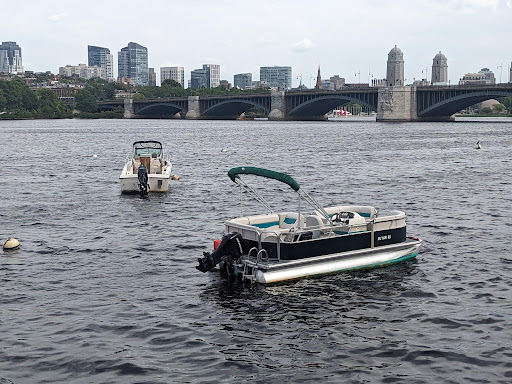

Describe the scene?

-------Response--------
The scene depicts a calm body of water, likely a river or a bay, with two boats anchored in the foreground. The larger of the two boats is a pontoon boat with a dark blue hull and a light-colored deck. It has a green awning stretched over the seating area. The boat is clearly marked with a license or registration number on its side. Behind it, and slightly to the left, is a smaller, open motorboat.

In the background, a cityscape is visible, featuring several modern high-rise buildings and older structures with distinct architectural details. A long, stone bridge with multiple arches spans the water, connecting the foreground to the background cityscape. The sky above is overcast, suggesting a somewhat hazy or cloudy day. Small buoys are scattered in the water around the boats, possibly marking channels or restricted areas.

In [9]:
# Load image from Cloud Storage URI
gcs_uri = "gs://cloud-samples-data/generative-ai/image/boats.jpeg"

# Prepare contents
image = Part.from_uri(file_uri=gcs_uri, mime_type="image/jpeg")
prompt = "Describe the scene?"
contents = [image, prompt]

responses = client.models.generate_content_stream(
    model=MODEL, contents=contents
)
print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

#### Combining multiple images and text prompts in JSON format for few-shot prompting

You can send more than one image at a time, and also place your images anywhere alongside your text prompt.

In the example below, few-shot prompting is performed to have Gemini return the city and landmark in a specific JSON format.<br>
We can force the ouput JSON schama by providing pydantic model.

In [ ]:
# Define the return JSON schema using pydantic
class LandmarkInfo(BaseModel):
    city: str
    landmark: str

In [ ]:
# Load images from Cloud Storage URI
image1_url = (
    "https://storage.googleapis.com/github-repo/img/gemini/intro/landmark1.jpg"
)
image2_url = (
    "https://storage.googleapis.com/github-repo/img/gemini/intro/landmark2.jpg"
)
image3_url = (
    "https://storage.googleapis.com/github-repo/img/gemini/intro/landmark3.jpg"
)
image1 = Part.from_uri(file_uri=image1_url, mime_type="image/jpeg")
image2 = Part.from_uri(file_uri=image2_url, mime_type="image/jpeg")
image3 = Part.from_uri(file_uri=image3_url, mime_type="image/jpeg")

# Prepare output examples
prompt1 = Part.json(LandmarkInfo(city="London", landmark="Big Ben"))
prompt2 = Part.json(LandmarkInfo(city="Paris", landmark="Eiffel Tower"))

# Prepare contents
contents = [image1, prompt1, image2, prompt2, image3]

# Specify output schema
generate_config = GenerateContentConfig(
    response_mime_type="application/json",
    response_schema=LandmarkInfo,
)

responses = client.models.generate_content_stream(
    model=MODEL, contents=contents, config=generate_config
)

print("-------Prompt--------")
print_multimodal_prompt(contents)

print("\n-------Response--------")
for response in responses:
    print(response.text, end="")

### Generate text from a video file

Specify the Cloud Storage URI of the video to include in the prompt. The bucket that stores the file must be in the same Google Cloud project that's sending the request. You must also specify the `mime_type` field. The supported MIME type for video includes `video/mp4`.


In [ ]:
file_path = "github-repo/img/gemini/multimodality_usecases_overview/pixel8.mp4"
video_uri = f"gs://{file_path}"
video_url = f"https://storage.googleapis.com/{file_path}"

IPython.display.Video(video_url, width=450)

In [ ]:
prompt = """
Answer the following questions using the video only:
What is the profession of the main person?
What are the main features of the phone highlighted?
Which city was this recorded in?
Provide the answer JSON.
"""

video = Part.from_uri(file_uri=video_uri, mime_type="video/mp4")
contents = [prompt, video]

generate_config = GenerateContentConfig(
    response_mime_type="application/json",
)

responses = client.models.generate_content_stream(
    model=MODEL, contents=contents, config=generate_config
)

for response in responses:
    print(response.text, end="")

### All modalities (images, video, audio, text) at once

Gemini is natively multimodal and supports interleaving of data from different modalities, it can support a mix of audio, visual, text, and code inputs in the same input sequence.

In [ ]:
video_file_path = (
    "cloud-samples-data/generative-ai/video/behind_the_scenes_pixel.mp4"
)
video_file_uri = f"gs://{video_file_path}"
video_file_url = f"https://storage.googleapis.com/{video_file_path}"

IPython.display.Video(video_file_url, width=450)

In [ ]:
image_file_path = "cloud-samples-data/generative-ai/image/a-man-and-a-dog.png"
image_file_uri = f"gs://{image_file_path}"
image_file_url = f"https://storage.googleapis.com/{image_file_path}"

IPython.display.Image(image_file_url, width=450)

In [ ]:
video_file = Part.from_uri(file_uri=video_file_uri, mime_type="video/mp4")
image_file = Part.from_uri(file_uri=image_file_uri, mime_type="image/png")

prompt = """
  Look through each frame in the video carefully and answer the questions.
  Only base your answers strictly on what information is available in the video attached.
  Do not make up any information that is not part of the video and do not be too
  verbose, be to the point.

  Questions:
  - When is the moment in the image happening in the video? Provide a timestamp.
  - What is the context of the moment and what does the narrator say about it?
"""

contents = [video_file, image_file, prompt]

response = client.models.generate_content(model=MODEL, contents=contents)
print(response.text)

## Acknowledgement 

This notebook is adapted from a [tutorial](https://github.com/GoogleCloudPlatform/generative-ai/commits/main/gemini/getting-started/intro_gemini_python.ipynb)
written by Polong Lin.

Copyright 2024 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

     https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.